# MNIST Handwritten Digit Recognizer using Deep CNN

## 1. Importing the Libraries

In [1]:
# Importing Tensorflow and keras
#Keras is built into TF 2.0

import tensorflow as tf
from tensorflow.keras import layers
from keras.utils import np_utils
from keras.datasets import mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
%matplotlib inline

np.random.seed(2)

from sklearn.metrics import confusion_matrix
import itertools

#Tensorflow Version
print("TensorFlow Version:   "+tf.version.VERSION)
print("Keras Version:   "+tf.keras.__version__)

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2
TensorFlow Version:   2.5.0-rc1
Keras Version:   2.5.0


# Importing data

In [2]:
(X_train,Y_train),(X_val,Y_val) = mnist.load_data()
print(X_train.shape, Y_train.shape)

(60000, 28, 28) (60000,)


# 2. Preparing the Dataset

### Reshape

In [3]:
num_classes = 10
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_val = X_val.reshape(X_val.shape[0], 28, 28, 1)
# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(Y_train, num_classes)
Y_val = np_utils.to_categorical(Y_val, num_classes)
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')

### Normalisation

In [4]:
X_train /= 255
X_val /= 255
print('x_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_val.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


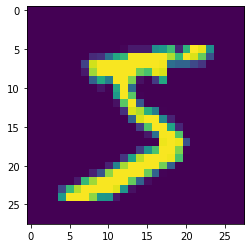

In [5]:
#Show some example 

g = plt.imshow(X_train[0][:,:,0])

## 3. Model Building

In [6]:
#CNN Architecture is In -> [[Conv2D->relu]*2 -> MaxPool2D -> Dropout]*2 -> 
                           #Flatten -> Dense -> Dropout -> Out
model = tf.keras.Sequential()

model.add(layers.Conv2D(filters=32, kernel_size=(5,5), padding='Same', 
                       activation=tf.nn.relu, input_shape = (28,28,1)))
model.add(layers.Conv2D(filters=32, kernel_size=(5,5), padding='Same', 
                       activation=tf.nn.relu))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Dropout(0.25))


model.add(layers.Conv2D(filters=64, kernel_size=(3,3), padding='Same', 
                       activation=tf.nn.relu, input_shape = (28,28,1)))
model.add(layers.Conv2D(filters=64, kernel_size=(3,3), padding='Same', 
                       activation=tf.nn.relu))
model.add(layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())
model.add(layers.Dense(256,activation=tf.nn.relu))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(10,activation=tf.nn.softmax))

### Optimizers and Annealers

In [7]:
#Defining Optimizer

optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-08, decay=0.0)


In [8]:
#Compiling Model

model.compile(optimizer = optimizer, loss='categorical_crossentropy', 
             metrics=["accuracy"])

In [9]:
#Setting Learning rate annealer

learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy',
                                           patience=3,
                                           verbose=1,
                                           factor=0.5,
                                           min_lr=0.00001)

In [10]:
epochs=10
batch_size = 112

### Data Augmentation

In [11]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)

## 4. Model Fitting

In [12]:
if(tf.test.is_built_with_cuda() == True):
    print("CUDA Available.. Just wait a few moments...")
else: 
    print("CUDA not Available.. May the force be with you.")

CUDA Available.. Just wait a few moments...


In [13]:
# Fit the model
history = model.fit(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])
#print("The model has successfully trained")

Epoch 1/10
535/535 - 245s - loss: 0.3229 - accuracy: 0.8981 - val_loss: 0.0366 - val_accuracy: 0.9883
Epoch 2/10
535/535 - 272s - loss: 0.0919 - accuracy: 0.9719 - val_loss: 0.0261 - val_accuracy: 0.9922
Epoch 3/10
535/535 - 234s - loss: 0.0679 - accuracy: 0.9804 - val_loss: 0.0274 - val_accuracy: 0.9906
Epoch 4/10
535/535 - 235s - loss: 0.0595 - accuracy: 0.9826 - val_loss: 0.0214 - val_accuracy: 0.9934
Epoch 5/10
535/535 - 254s - loss: 0.0527 - accuracy: 0.9841 - val_loss: 0.0189 - val_accuracy: 0.9937
Epoch 6/10
535/535 - 241s - loss: 0.0489 - accuracy: 0.9859 - val_loss: 0.0167 - val_accuracy: 0.9948
Epoch 7/10
535/535 - 213s - loss: 0.0469 - accuracy: 0.9862 - val_loss: 0.0163 - val_accuracy: 0.9946
Epoch 8/10
535/535 - 276s - loss: 0.0456 - accuracy: 0.9868 - val_loss: 0.0203 - val_accuracy: 0.9941
Epoch 9/10
535/535 - 206s - loss: 0.0441 - accuracy: 0.9873 - val_loss: 0.0190 - val_accuracy: 0.9937

Epoch 00009: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
E

## 5. Analyzing the model 

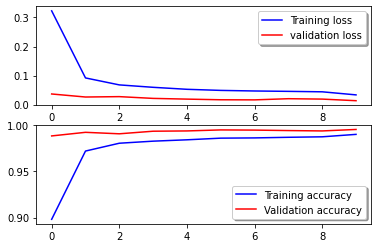

In [24]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

### Confusion Matrix Plotting

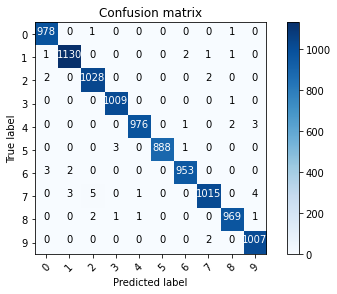

In [25]:
# Look at confusion matrix 

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10)) 

### Important Error

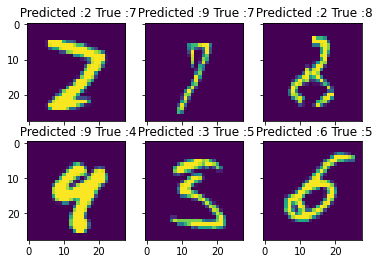

In [26]:
# Display some error results 

# Errors are difference between predicted labels and true labels
errors = (Y_pred_classes - Y_true != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = Y_pred[errors]
Y_true_errors = Y_true[errors]
X_val_errors = X_val[errors]

def display_errors(errors_index,img_errors,pred_errors, obs_errors):
    """ This function shows 6 images with their predicted and real labels"""
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((28,28)))
            ax[row,col].set_title(" Predicted :{} True :{}".format(pred_errors[error],obs_errors[error]))
            n += 1

# Probabilities of the wrong predicted numbers
Y_pred_errors_prob = np.max(Y_pred_errors,axis = 1)

# Predicted probabilities of the true values in the error set
true_prob_errors = np.diagonal(np.take(Y_pred_errors, Y_true_errors, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors

# Sorted list of the delta prob errors
sorted_dela_errors = np.argsort(delta_pred_true_errors)

# Top 6 errors 
most_important_errors = sorted_dela_errors[-6:]

# Show the top 6 errors
display_errors(most_important_errors, X_val_errors, Y_pred_classes_errors, Y_true_errors)

## 6. Predicting the test data

In [27]:
score = model.evaluate(X_val, Y_val, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.013429732993245125
Test accuracy: 0.9952999949455261


In [28]:
model.save('mymodel.h5')
print("Saving the model as mymodel.h5")

Saving the model as mymodel.h5
